In [129]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm


from sklearn.cluster import KMeans

#### Lets load the input dataset. Since we see the headers are not present in the csv file, lets give header=None and provide column names for better readability

In [130]:
data_df = pd.read_csv("Qualitative_Bankruptcy.csv",header=None,names=['Ind_Risk','Mgmt_Risk','Fin_Flex','Credibility','Competitiveness','Operating_Risk','Class'])

In [131]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Ind_Risk           250 non-null object
Mgmt_Risk          250 non-null object
Fin_Flex           250 non-null object
Credibility        250 non-null object
Competitiveness    250 non-null object
Operating_Risk     250 non-null object
Class              250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [132]:
new_df=data_df.copy()

#### There are 7 columns. Class is the target column. Rest of the columns are independent variables. We see all the columns are objects. We need to do encoding and make them integers before we proceed with model building. We see there are 250 rows

In [133]:
data_df.duplicated().sum()

147

#### We see there are 147 duplicate rows in the file, lets remove them before building the model

In [134]:
#data_df.drop_duplicates(inplace=True)

In [135]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Ind_Risk           250 non-null object
Mgmt_Risk          250 non-null object
Fin_Flex           250 non-null object
Credibility        250 non-null object
Competitiveness    250 non-null object
Operating_Risk     250 non-null object
Class              250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [136]:
data_df['Ind_Risk']=np.where(data_df['Ind_Risk']=='P',1,np.where(data_df['Ind_Risk']=='A',2,3))
data_df['Mgmt_Risk']=np.where(data_df['Mgmt_Risk']=='P',1,np.where(data_df['Mgmt_Risk']=='A',2,3))
data_df['Fin_Flex']=np.where(data_df['Fin_Flex']=='P',1,np.where(data_df['Fin_Flex']=='A',2,3))
data_df['Credibility']=np.where(data_df['Credibility']=='P',1,np.where(data_df['Credibility']=='A',2,3))
data_df['Competitiveness']=np.where(data_df['Competitiveness']=='P',1,np.where(data_df['Competitiveness']=='A',2,3))
data_df['Operating_Risk']=np.where(data_df['Operating_Risk']=='P',1,np.where(data_df['Operating_Risk']=='A',2,3))
data_df['Class']=np.where(data_df['Class']=='NB',0,1)

#### Now lets see if the data type is changed to int

In [137]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Ind_Risk           250 non-null int32
Mgmt_Risk          250 non-null int32
Fin_Flex           250 non-null int32
Credibility        250 non-null int32
Competitiveness    250 non-null int32
Operating_Risk     250 non-null int32
Class              250 non-null int32
dtypes: int32(7)
memory usage: 7.0 KB


In [138]:
data_df.describe()

,Ind_Risk,Mgmt_Risk,Fin_Flex,Credibility,Competitiveness,Operating_Risk,Class
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.00000,250.000000
mean,2.036000,2.22800,2.248000,2.060000,2.048000,2.14000,0.428000
std,0.823051,0.82141,0.803166,0.831363,0.881364,0.86915,0.495781
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,0.000000
25%,1.000000,2.00000,2.000000,1.000000,1.000000,1.00000,0.000000
50%,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,0.000000
75%,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,1.000000
max,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,1.000000


In [139]:
data_df['Ind_Risk'].value_counts()

3    89
2    81
1    80
Name: Ind_Risk, dtype: int64

In [140]:
data_df['Mgmt_Risk'].value_counts()

3    119
2     69
1     62
Name: Mgmt_Risk, dtype: int64

In [141]:
data_df['Fin_Flex'].value_counts()

3    119
2     74
1     57
Name: Fin_Flex, dtype: int64

In [142]:
data_df['Credibility'].value_counts()

3    94
1    79
2    77
Name: Credibility, dtype: int64

In [143]:
data_df['Competitiveness'].value_counts()

3    103
1     91
2     56
Name: Competitiveness, dtype: int64

In [144]:
data_df['Operating_Risk'].value_counts()

3    114
1     79
2     57
Name: Operating_Risk, dtype: int64

In [145]:
data_df['Class'].value_counts()

0    143
1    107
Name: Class, dtype: int64

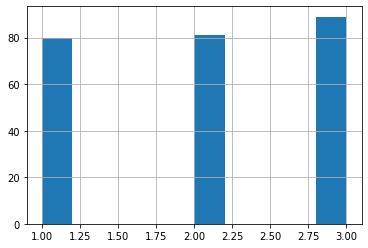

In [146]:
data_df['Ind_Risk'].hist()

#### We see occurence of negative Industrial Risk is less compared to positive and average risk

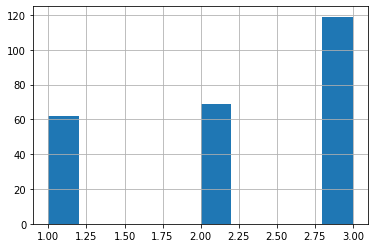

In [147]:
data_df['Mgmt_Risk'].hist()

#### We see quite a good occurence of negative Management Risk compared to positive and average risk

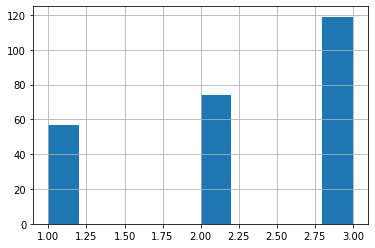

In [148]:
data_df['Fin_Flex'].hist()

#### we see for Financial Flexibility negative value occurence is more

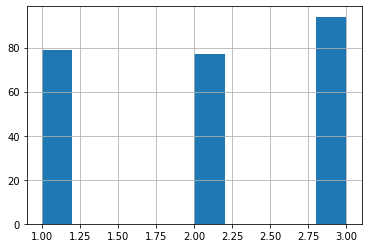

In [149]:
data_df['Credibility'].hist()

#### Occurence of negative credibility risk seems high

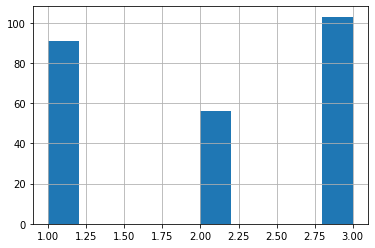

In [150]:
data_df['Competitiveness'].hist()

#### Competitiveness has high occurence of negative risks.

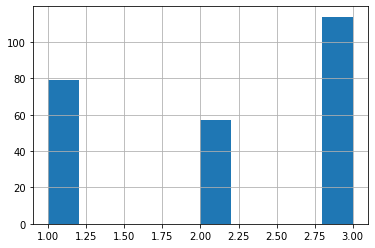

In [151]:
data_df['Operating_Risk'].hist()

#### Negative risk occurence is high for Operating Risk

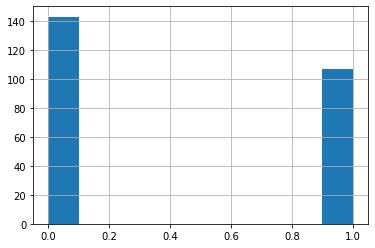

In [152]:
data_df['Class'].hist()

#### There is a class imbalance, bankrupt records are less compared to non bankrupt records

#### Since all the columns are have the same set of values, scaling is not required

In [153]:
corr_matrix = data_df.corr().abs()

#Select upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

#find features with high correlation ( > 0.90; Assumption)
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

print(to_drop, "can be dropped")

[] can be dropped


#### None of the columns are highly correlated

In [154]:
data_df.corr()['Class'].sort_values(ascending=False)

Class              1.000000
Competitiveness    0.899452
Credibility        0.755909
Fin_Flex           0.751020
Mgmt_Risk          0.370838
Operating_Risk     0.279786
Ind_Risk           0.227823
Name: Class, dtype: float64

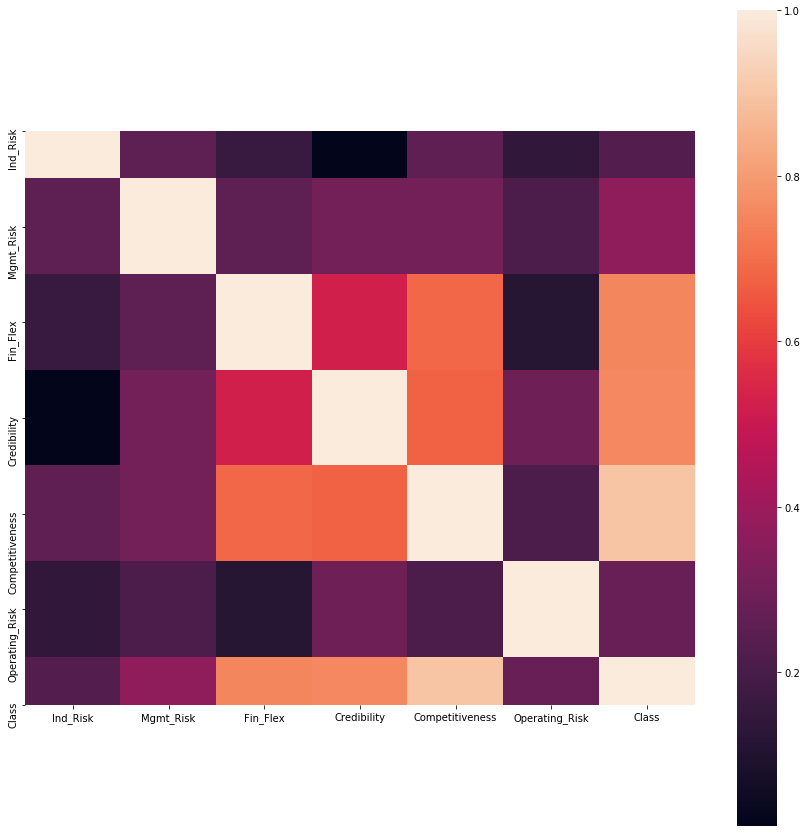

In [155]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data_df.corr(),square=True)

C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


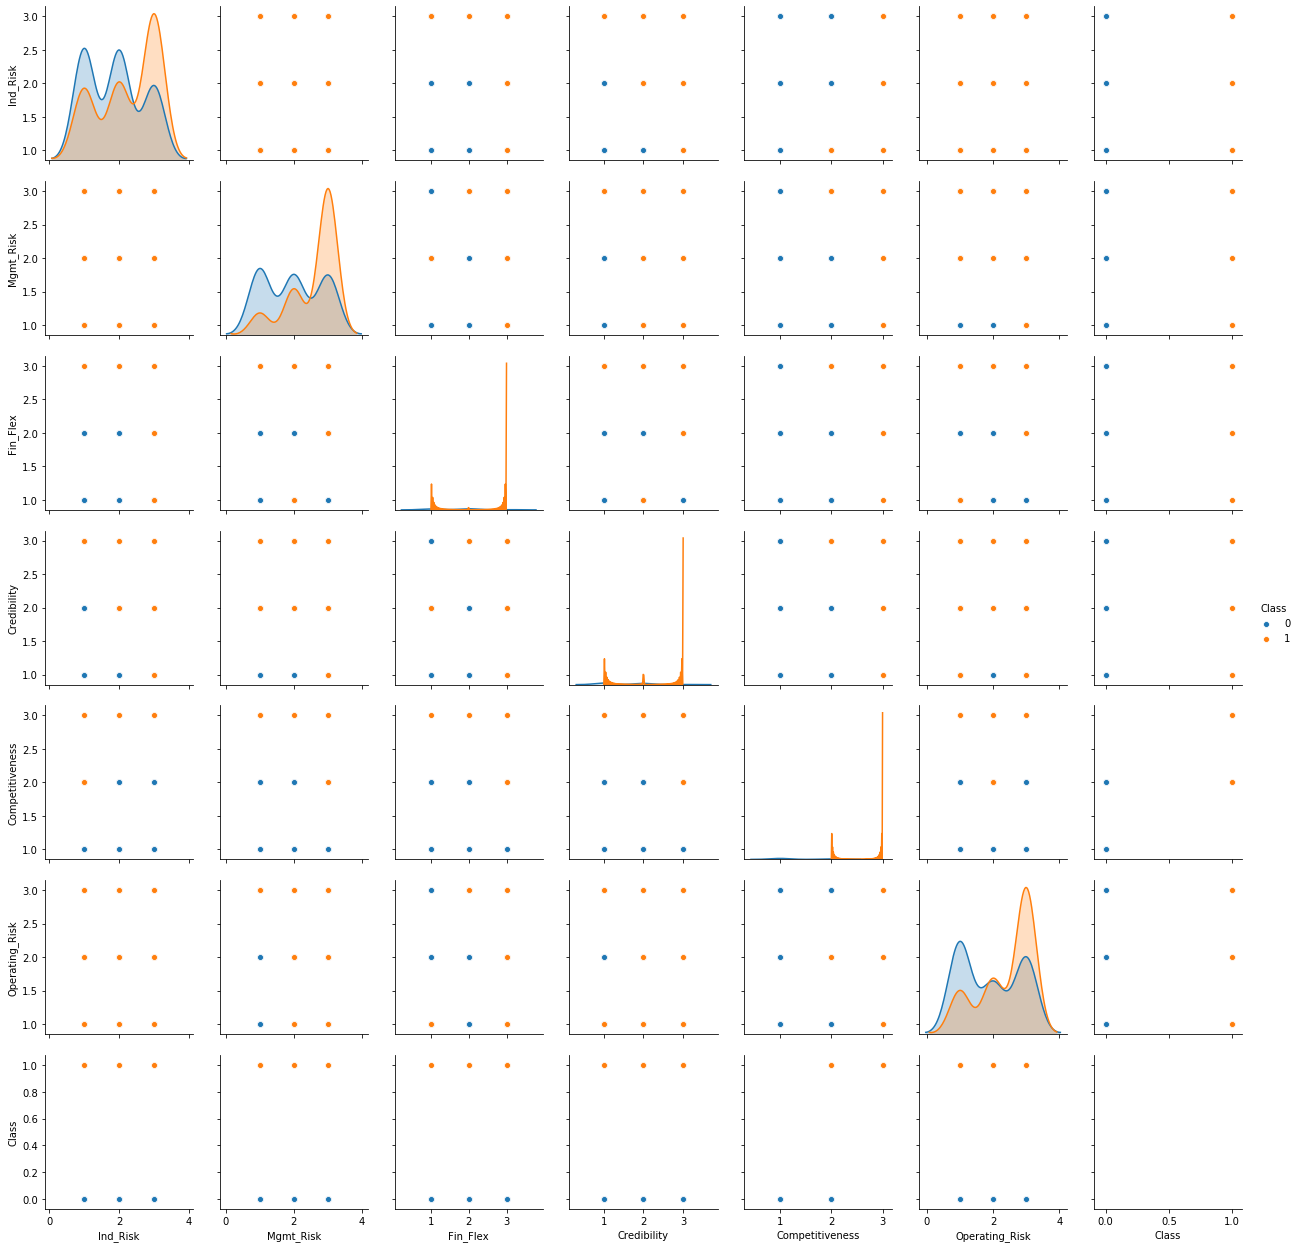

In [156]:
sns.pairplot(data_df,hue='Class')

#### Competitiveness has a strong correlation with the target Class column
#### Credibility and Financial Flexibility have good correlation with Class column
#### Other columns have average correlation with the Class column
#### None of the independent variables are highly correlated with each other

In [157]:
# Separating the target column
y=data_df['Class']

In [158]:
y.shape

(250,)

In [159]:
cols=['Class']
X =  data_df.drop(cols,axis=1,inplace=False)

In [160]:
X.shape

(250, 6)

In [161]:
WCSS=[]

In [162]:
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

In [163]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


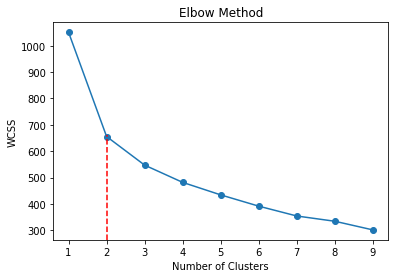

In [164]:
plt.plot(range(1,10),WCSS,marker="o")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=2,color='r',linestyle='--',ymax=0.48)
plt.show()

#### Optimal K value seems to be 3 but since we need only 2 clustering whether bankrupt or not, we go with 2 clusters

In [165]:
# Create K Means cluster and store the result in the object k_means
k_means2 = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)

In [166]:
k_means2.fit(X)
k_labels = k_means2.predict(X)

In [167]:
data_df['k2_labels']=k_labels

In [168]:
print(data_df.corr()['k2_labels'])

Ind_Risk          -0.237039
Mgmt_Risk         -0.387870
Fin_Flex          -0.757738
Credibility       -0.754462
Competitiveness   -0.888804
Operating_Risk    -0.306092
Class             -0.975553
k2_labels          1.000000
Name: k2_labels, dtype: float64


In [169]:
from sklearn.metrics.cluster import completeness_score
print(completeness_score(data_df['Class'],data_df['k2_labels']))

0.9052833218893043


In [170]:
from sklearn.metrics.cluster import fowlkes_mallows_score

In [171]:
print(fowlkes_mallows_score(data_df['Class'],data_df['k2_labels']))

0.9765608743496289


#### k means clusters thus created has high correlation with Competitiveness, Financial Flexibility and Credibility Columnbs
#### Though we did not use the target variable Class for clustering, lets see the correlation just to guess how close is the clustering to the actual target variable values. By the strong correlation of .975553 with the class column (our target column from the original data set) we see that the accuracy for the model is good (ignore negative sign as the cluster labels are put arbitrarily)

### Hierarchical Clustering

In [172]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [173]:
Z=linkage(X,method='ward',metric='euclidean')

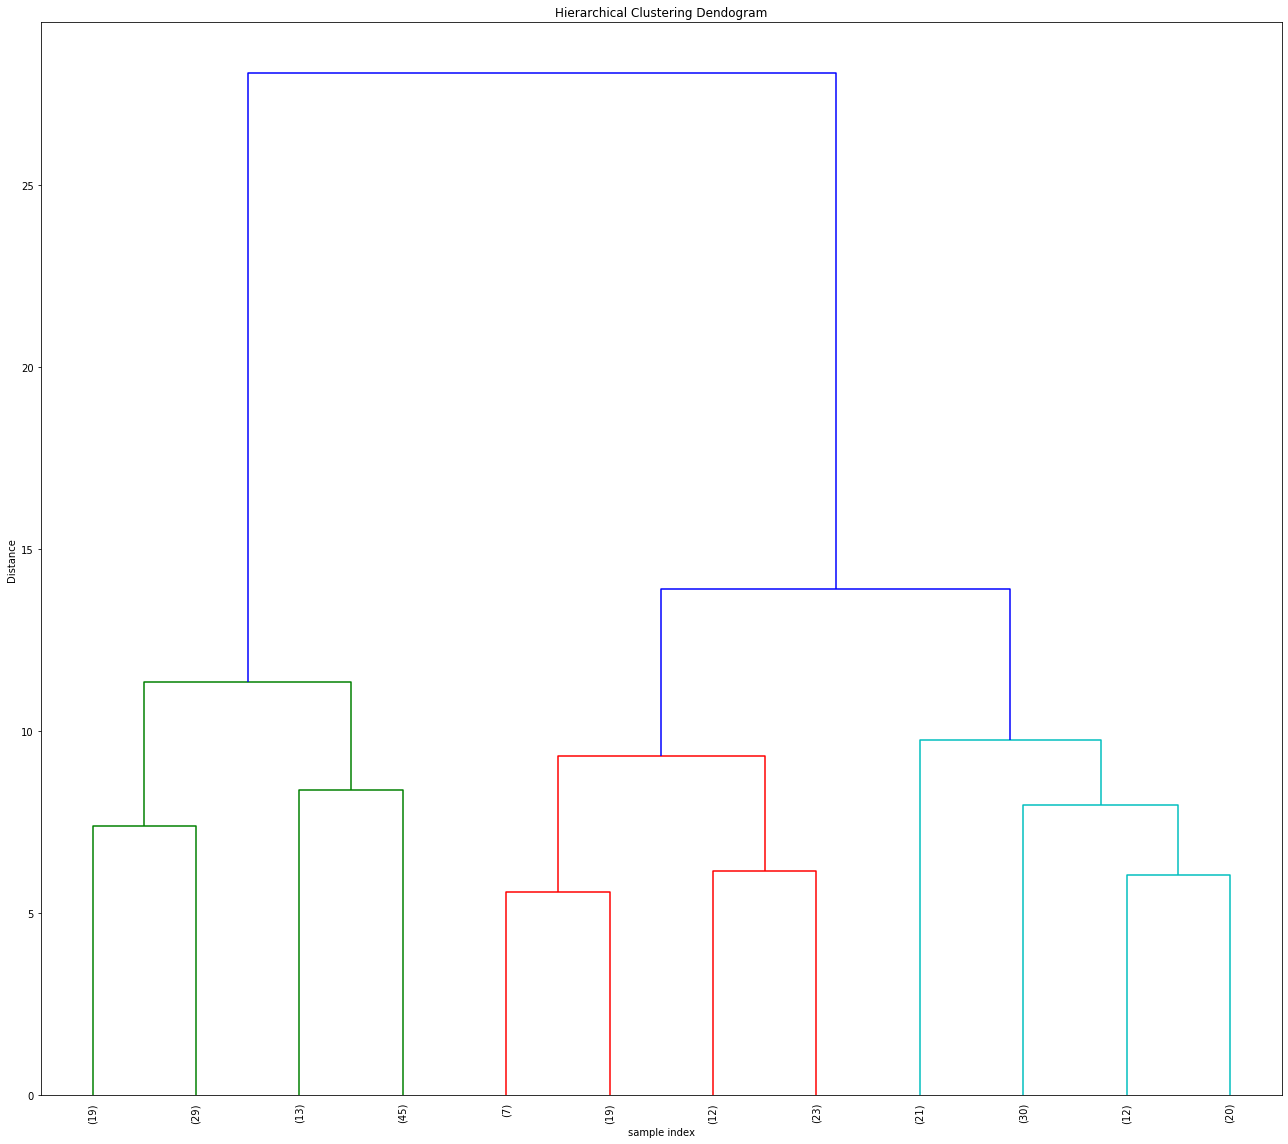

In [174]:
plt.figure(figsize=(18, 16))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

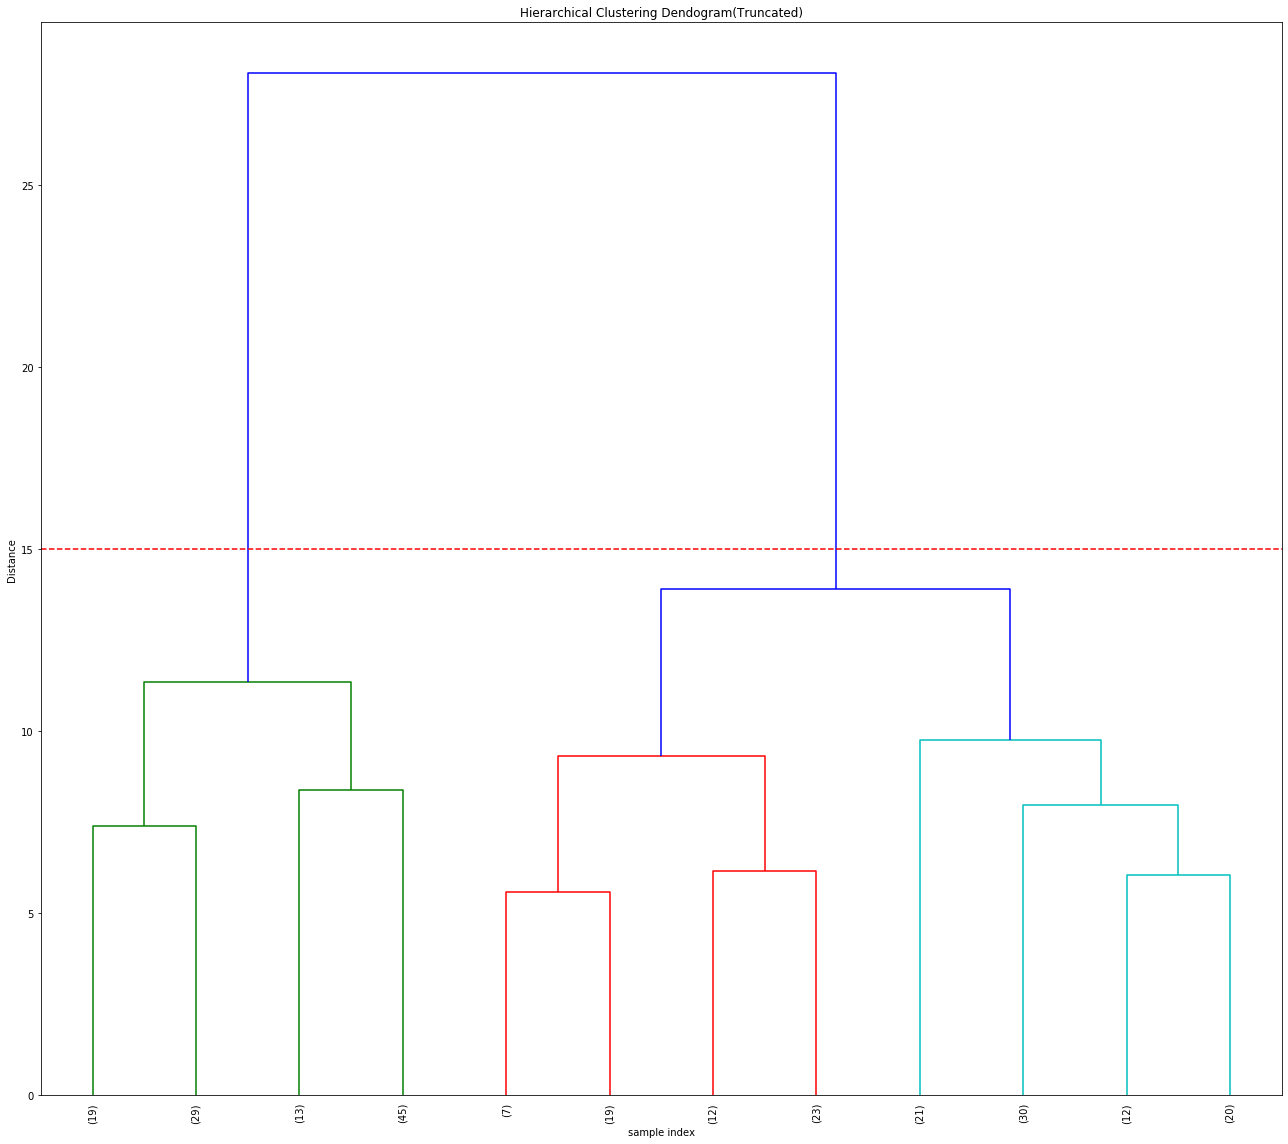

In [175]:
plt.figure(figsize=(18, 16))
plt.title('Hierarchical Clustering Dendogram(Truncated)')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.axhline(y=15,color='r',linestyle='--')
plt.tight_layout()

In [176]:
max_d=15

In [177]:
from scipy.cluster.hierarchy import fcluster

In [178]:
z_clusters=fcluster(Z,max_d,criterion='distance')

In [179]:
z_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [180]:
data_df['z_labels']=z_clusters

In [181]:
print(data_df.corr()['z_labels'])

Ind_Risk          -0.218599
Mgmt_Risk         -0.373538
Fin_Flex          -0.764531
Credibility       -0.757410
Competitiveness   -0.891781
Operating_Risk    -0.290763
Class             -0.991854
k2_labels          0.983794
z_labels           1.000000
Name: z_labels, dtype: float64


We see Hirerchical cluster performance is better compared to K means because of its closeness to the Class column. Negative sign in the correlation should be ignored here as the cluster numbers are assigned artibrarily

In [182]:
print(completeness_score(data_df['Class'],data_df['z_labels']))

0.9667338333431409


In [183]:
print(fowlkes_mallows_score(data_df['Class'],data_df['z_labels']))

0.9921420682825469


In [184]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [186]:
from sklearn.svm import SVC

In [187]:
svc_clf=SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [188]:
svc_clf.fit(X_train,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [189]:
y_predict0 = svc_clf.predict(X_test)
print('Classification: \n', metrics.classification_report(y_test, y_predict0))

Classification: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        34

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [190]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict0)
print(confusion_matrix)

[[41  0]
 [ 0 34]]


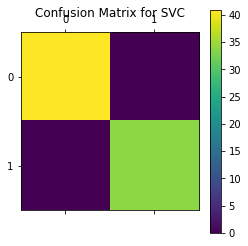

In [191]:
plt.matshow(confusion_matrix)
plt.title("Confusion Matrix for SVC")
plt.colorbar()
plt.show()

In [192]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict0)

1.0

### Lets repeat the same exercise and see the performance after removing duplicates

In [193]:
data2_df=data_df.copy()

In [194]:
data2_df.drop(['k2_labels','z_labels'],axis=1,inplace=True)

In [195]:
data2_df.drop_duplicates(inplace=True)

In [196]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
Ind_Risk           250 non-null int32
Mgmt_Risk          250 non-null int32
Fin_Flex           250 non-null int32
Credibility        250 non-null int32
Competitiveness    250 non-null int32
Operating_Risk     250 non-null int32
Class              250 non-null int32
k2_labels          250 non-null int32
z_labels           250 non-null int32
dtypes: int32(9)
memory usage: 8.9 KB


In [197]:
data2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 215
Data columns (total 7 columns):
Ind_Risk           103 non-null int32
Mgmt_Risk          103 non-null int32
Fin_Flex           103 non-null int32
Credibility        103 non-null int32
Competitiveness    103 non-null int32
Operating_Risk     103 non-null int32
Class              103 non-null int32
dtypes: int32(7)
memory usage: 3.6 KB


In [198]:
data2_df['Ind_Risk'].value_counts()

2    36
1    35
3    32
Name: Ind_Risk, dtype: int64

In [199]:
data2_df['Mgmt_Risk'].value_counts()

3    42
2    32
1    29
Name: Mgmt_Risk, dtype: int64

In [200]:
data2_df['Fin_Flex'].value_counts()

2    36
1    34
3    33
Name: Fin_Flex, dtype: int64

In [201]:
data2_df['Credibility'].value_counts()

2    42
1    39
3    22
Name: Credibility, dtype: int64

In [202]:
data2_df['Competitiveness'].value_counts()

1    53
2    26
3    24
Name: Competitiveness, dtype: int64

In [203]:
data2_df['Operating_Risk'].value_counts()

3    41
1    38
2    24
Name: Operating_Risk, dtype: int64

In [204]:
data2_df['Class'].value_counts()

0    78
1    25
Name: Class, dtype: int64

In [205]:
X_nodup =  data2_df.drop(cols,axis=1,inplace=False)
Y_nodup = data2_df['Class']

In [206]:
k_means2_nodup = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)
k_means2_nodup.fit(X_nodup)
k_labels_nodup = k_means2_nodup.predict(X_nodup)

In [207]:
data2_df['k_labels_nodup']=k_labels_nodup

In [208]:
print(data2_df.corr()['k_labels_nodup'])

Ind_Risk           0.185873
Mgmt_Risk          0.258046
Fin_Flex           0.664130
Credibility        0.659521
Competitiveness    0.799366
Operating_Risk     0.131490
Class              0.898343
k_labels_nodup     1.000000
Name: k_labels_nodup, dtype: float64


In [209]:
print(completeness_score(data2_df['Class'],data2_df['k_labels_nodup']))

0.7145422032201587


In [210]:
print(fowlkes_mallows_score(data2_df['Class'],data2_df['k_labels_nodup']))

0.9392298980356275


In [211]:
Z_nodup=linkage(X_nodup,method='ward',metric='euclidean')

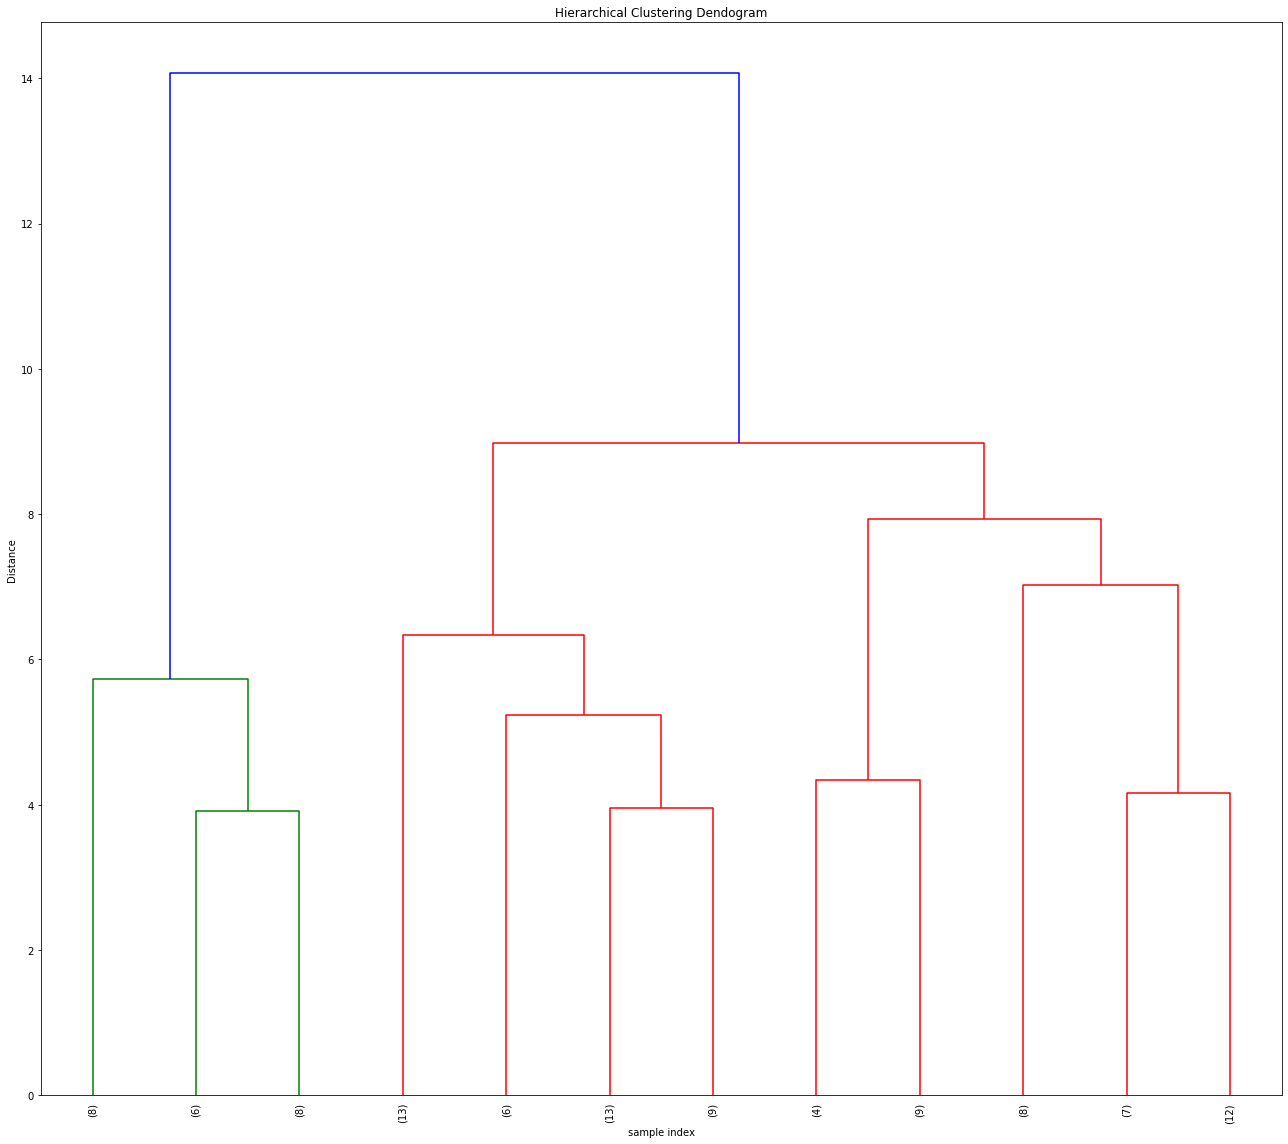

In [212]:
plt.figure(figsize=(18, 16))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_nodup,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

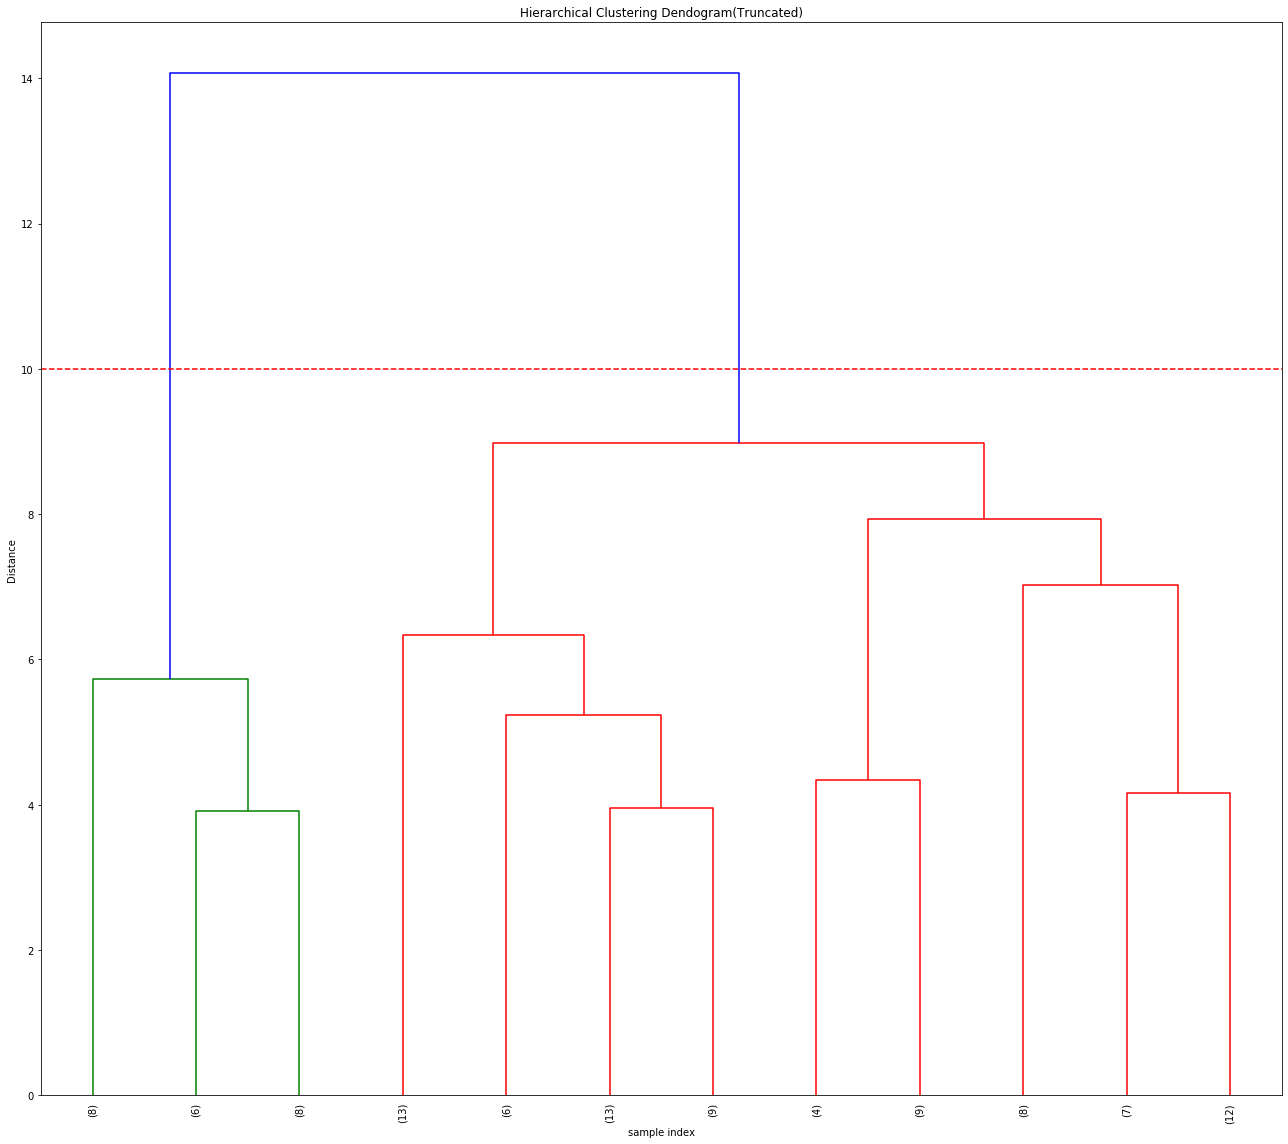

In [213]:
plt.figure(figsize=(18, 16))
plt.title('Hierarchical Clustering Dendogram(Truncated)')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_nodup,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.axhline(y=10,color='r',linestyle='--')
plt.tight_layout()

In [214]:
z_clusters_nodup=fcluster(Z_nodup,10,criterion='distance')

In [215]:
z_clusters_nodup

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [216]:
data2_df['z_labels_nodup']=z_clusters_nodup

In [217]:
print(data2_df.corr()['z_labels_nodup'])

Ind_Risk          -0.253959
Mgmt_Risk         -0.150785
Fin_Flex          -0.623122
Credibility       -0.555653
Competitiveness   -0.816995
Operating_Risk    -0.199170
Class             -0.920547
k_labels_nodup    -0.874367
z_labels_nodup     1.000000
Name: z_labels_nodup, dtype: float64


In [218]:
print(completeness_score(data2_df['Class'],data2_df['z_labels_nodup']))

0.8282950691643448


In [219]:
X_train_nodup, X_test_nodup, y_train_nodup, y_test_nodup = train_test_split(X_nodup, Y_nodup, test_size=0.30, random_state=1)

In [220]:
svc_clf2=SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [221]:
svc_clf2.fit(X_train_nodup,y_train_nodup)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [222]:
y_predict_nodup = svc_clf2.predict(X_test_nodup)
print('Classification: \n', metrics.classification_report(y_test_nodup, y_predict_nodup))

Classification: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.90      0.95        10

    accuracy                           0.97        31
   macro avg       0.98      0.95      0.96        31
weighted avg       0.97      0.97      0.97        31



In [223]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_nodup, y_predict_nodup)
print(confusion_matrix)

[[21  0]
 [ 1  9]]


In [224]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nodup, y_predict_nodup)

0.967741935483871

#### With the duplicate values retained, we see that SVC is performing better (100% accuracy) than clustering [K means or Hirerchical] but if we remove the duplicate rows in the input file, we see the performance of all 3 drop, (K means, Hirerchical Clustering and SVC). The reason is duplicates creates some class imbalance. we see here the  occurence negative risk values are high for most of the parameters when compared the case where we have removed the duplicates. So with duplicates which means we get better training data for the Bankrupt cases. So for this dataset, it good we retain duplicates here and prefer SVC model.

In [225]:
# Not lets quickly try get dummies instead of the manual encoding and see how the performance of the models change
# Here lets use the copy of the original dataset without removing the duplicates as we know removing duplicates does not help us

In [226]:
dummy_df=pd.get_dummies(new_df)

In [227]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
Ind_Risk_A           250 non-null uint8
Ind_Risk_N           250 non-null uint8
Ind_Risk_P           250 non-null uint8
Mgmt_Risk_A          250 non-null uint8
Mgmt_Risk_N          250 non-null uint8
Mgmt_Risk_P          250 non-null uint8
Fin_Flex_A           250 non-null uint8
Fin_Flex_N           250 non-null uint8
Fin_Flex_P           250 non-null uint8
Credibility_A        250 non-null uint8
Credibility_N        250 non-null uint8
Credibility_P        250 non-null uint8
Competitiveness_A    250 non-null uint8
Competitiveness_N    250 non-null uint8
Competitiveness_P    250 non-null uint8
Operating_Risk_A     250 non-null uint8
Operating_Risk_N     250 non-null uint8
Operating_Risk_P     250 non-null uint8
Class_B              250 non-null uint8
Class_NB             250 non-null uint8
dtypes: uint8(20)
memory usage: 5.0 KB


In [228]:
cols_new=['Class_B','Class_NB']
X_dummy =  dummy_df.drop(cols_new,axis=1,inplace=False)

In [229]:
k_means_dummy = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)

In [230]:
k_means_dummy.fit(X_dummy)
k_labels_dummy = k_means_dummy.predict(X_dummy)

In [231]:
# Add the labels so formed onto our original dataframe data_df and 
# lets try to find the completeness score against the actual class values

In [232]:
data_df['k2_labels_dummy']=k_labels_dummy

In [233]:
print(data_df.corr()['k2_labels_dummy'])

Ind_Risk          -0.217981
Mgmt_Risk         -0.380700
Fin_Flex          -0.771191
Credibility       -0.765652
Competitiveness   -0.881070
Operating_Risk    -0.279786
Class             -0.983661
k2_labels          0.975553
z_labels           0.991854
k2_labels_dummy    1.000000
Name: k2_labels_dummy, dtype: float64


In [234]:
print(completeness_score(data_df['Class'],data_df['k2_labels_dummy']))

0.9318778489803956


In [235]:
print(fowlkes_mallows_score(data_df['Class'],data_df['k2_labels_dummy']))

0.9843276036400403


In [236]:
# We see the completeness score of the K Means clustering is improved by using get dummies instead of manual encoding

In [237]:
Z_dummy=linkage(X_dummy,method='ward',metric='euclidean')

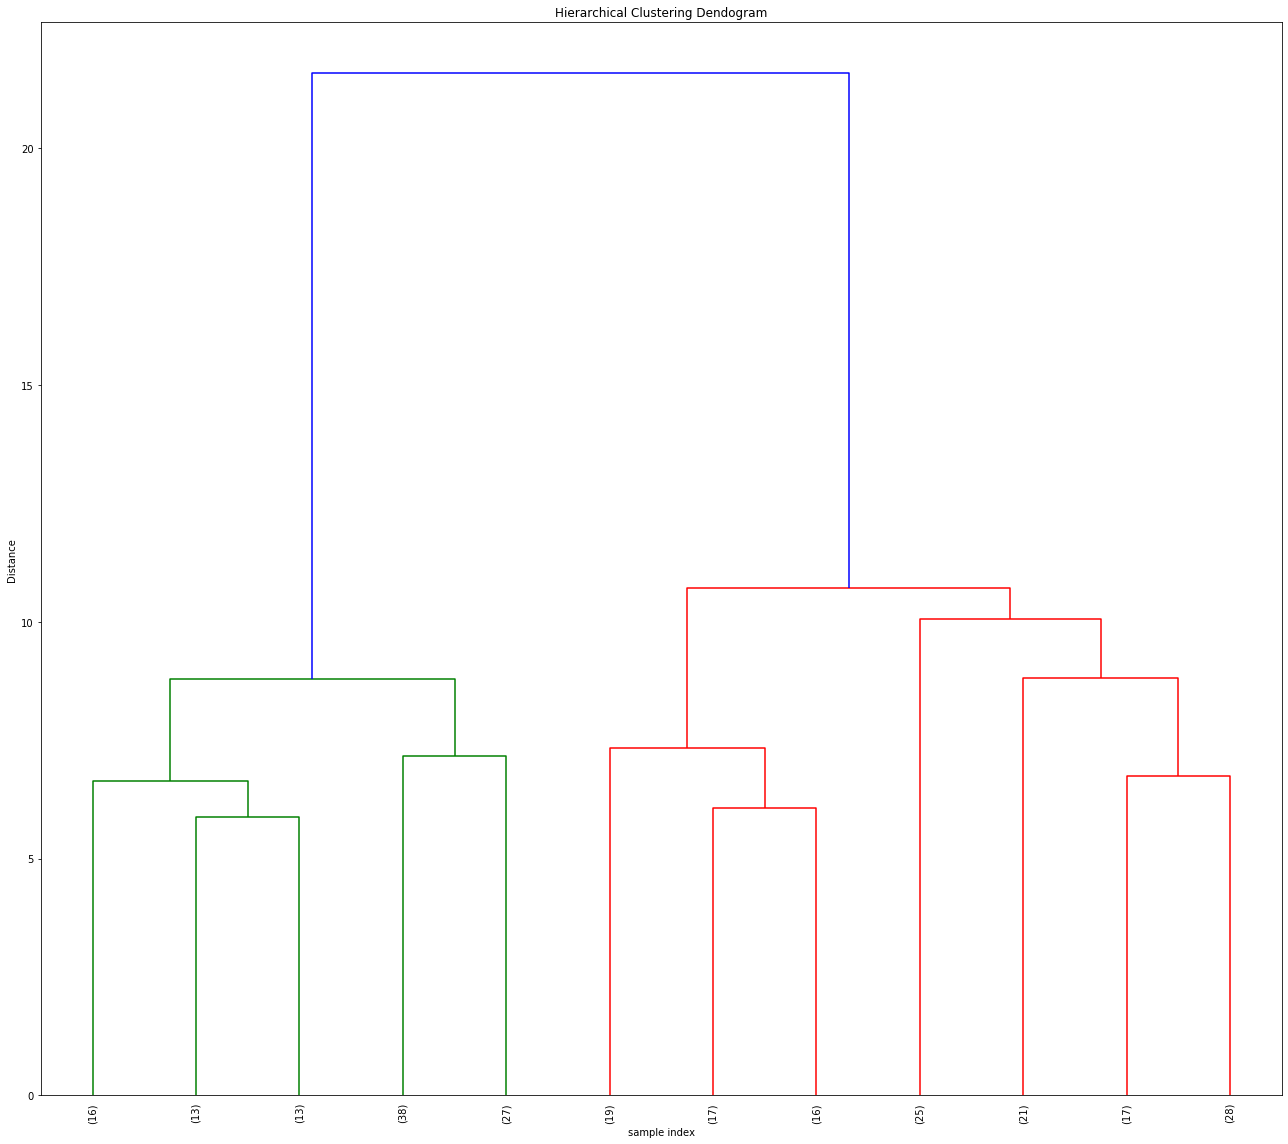

In [238]:
plt.figure(figsize=(18, 16))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_dummy,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

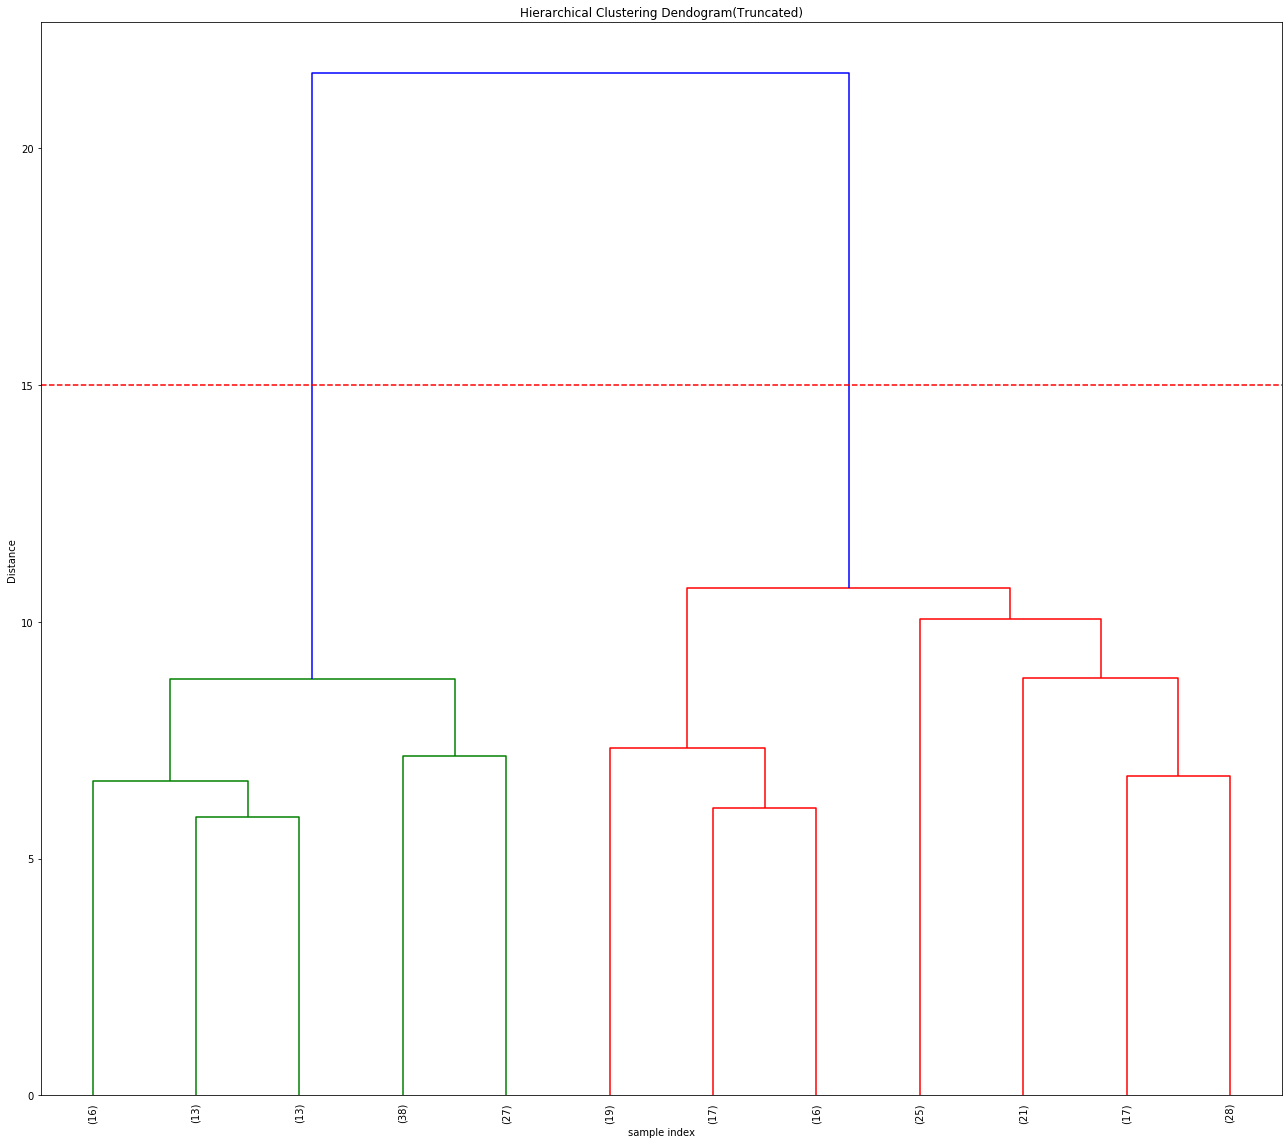

In [239]:
plt.figure(figsize=(18, 16))
plt.title('Hierarchical Clustering Dendogram(Truncated)')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_dummy,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.axhline(y=15,color='r',linestyle='--')
plt.tight_layout()

In [240]:
z_clusters_dummy=fcluster(Z_dummy,15,criterion='distance')

In [241]:
z_clusters_dummy

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [242]:
data_df['z_labels_dummy']=z_clusters_dummy

In [243]:
print(completeness_score(data_df['Class'],data_df['z_labels_dummy']))

1.0


In [244]:
print(fowlkes_mallows_score(data_df['Class'],data_df['z_labels_dummy']))

1.0


#### We see the correctness of Hirerchical clustering is 100% when we go with the get dummies method for handling categorical variables

In [245]:
## Lets give it a try with SVC also

In [246]:
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_dummy, y, test_size=0.30, random_state=1)

In [247]:
svc_clf_dummy=SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [248]:
svc_clf_dummy.fit(X_train_dummy,y_train_dummy)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [249]:
y_predict_dummy = svc_clf_dummy.predict(X_test_dummy)
print('Classification: \n', metrics.classification_report(y_test_dummy, y_predict_dummy))

Classification: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        34

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



#### SVC is performing with the same 100% testing accuracy for both manual encoding into 1,2,3 and with get dummies option

## Conclusion: 
#### Retaining the duplicates and using manual encoding using 1,2,3 values for treating categorical variables, we observe SVC performing better with 100% test accuracy than Hirerchical clustering [ completeness - 96.67% and Fowlkes_mallows_score - 99.21%]

#### Retaining the duplicates in k means, we see the Performance of K means is better with get dummies(completeness - 93%, fowlkes-mallows-score - 98.43%) than manual(completeness - 90.5%, fowlkes-mallows-score-97.65%) but In both the cases(get dummies, manual encoding) K means doesnt give better results than Hirerchical /SVC


#### Retaining duplicates and using get dummies for treating categorical variables, we see SVC and Hirerchical clustering both give the best results - SVC with the best test accuracy and Hirerchical with the completeness / fowlkes_mallows_score scores both being 100%

##### NOTE: Here, Label Encoding is not attempted here because it uses as 0,1,2 for encoding as we have 3 distinct values for each of the features columns(P,A,N). 0 will have adverse impact on K means clustering since its a distance based model, the euclidean distance calculation would go wrong here since one of the category values will be supressed during distance calculation. With 2 variables 0 wouldnt be a problem but with 3 variables 0 shouldnt used. So manual encoding to 1,2,3 (all 3 are non 0 labels) or get dummies(where we have 0 or 1 is used for each features category to say true or false) would both work but not label encoding using LabelEncoder